In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime
import pandas as pd

In [6]:
#Identify path
path = '/Users/emmabenedict/Desktop/CURO4970R/'

In [5]:
#Load .nc file for E3SM.HR and E3SM.MMF
#HR
esm_hr = xr.open_dataset(path + 'E3SM.HR.ne120pg2.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')
#MMF
esm_mmf = xr.open_dataset(path + 'E3SM.MMF.ne30pg2_CRM64x2000.0001-0010.US.2x2.5.hourly.PRECC.PRECL.nc')

In [7]:
#Load .nc file for CPC
cpc_nc = xr.open_dataset(path + 'CPC.1958-1997.US.2x2.5.hourly.precip.nc')
#Load .nc file for IMERG
imerg_nc = xr.open_dataset(path + 'IMERG.2001-2020.US.2x2.5.half_hourly.precipitationCal.nc')

In [8]:
#Load variables
#HR
lat_hr = esm_hr.lat
lon_hr = esm_hr.lon
time_hr = esm_hr.time
precc_hr = esm_hr.PRECC
precl_hr = esm_hr.PRECL
precip_hr = precc_hr + precl_hr
area_hr = esm_hr.area
#MMF
lat_mmf = esm_mmf.lat
lon_mmf = esm_mmf.lon
time_mmf = esm_mmf.time
precc_mmf = esm_mmf.PRECC
precl_mmf = esm_mmf.PRECL
precip_mmf = precc_mmf + precl_mmf
area_mmf = esm_mmf.area

In [9]:
#Load variables
#CPC
lat_cpc = cpc_nc.lat
lon_cpc = cpc_nc.lon
time_cpc = cpc_nc.time
precip_cpc = cpc_nc.precip
#MMF
lat_img = imerg_nc.lat
lon_img = imerg_nc.lon
time_img = imerg_nc.time
precip_img = imerg_nc.precipitationCal

In [10]:
#Specific locations: Athens and Seattle
hr_athens = precip_hr.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
hr_seattle = precip_hr.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24
mmf_athens = precip_mmf.sel(lon=276.64,lat=33.95,method="nearest")*1000*60*60*24
mmf_seattle = precip_mmf.sel(lon=237.67,lat=47.60,method="nearest")*1000*60*60*24
#Obs
cpc_athens = precip_cpc.sel(lon=276.64,lat=33.95,method="nearest")*25.4*24
cpc_seattle = precip_cpc.sel(lon=237.67,lat=47.60,method="nearest")*25.4*24
img_athens = precip_img.sel(lon=276.64,lat=33.95,method="nearest")*24
img_seattle = precip_img.sel(lon=237.67,lat=47.60,method="nearest")*24

In [11]:
#Use loop to calculate a three month average -- April, May, and June (amj)
months = [4,5,6]
amj_hr = []
for year in range(1, 10):  # Adjust based on your data's year range
    for month in months:
        # Filter data for the specific year and month
        monthly_data = precip_hr.sel(time=(precip_hr['time.year'] == year) & (precip_hr['time.month'] == month))
        amj_hr.append(monthly_data)

combine_amj_hr = xr.concat(amj_hr, dim='time')

In [12]:
avg_amj_hr = np.mean(combine_amj_hr, axis=0)

In [13]:
time_hr

<xarray.DataArray 'time' (time: 87600)>
array([cftime.DatetimeNoLeap(1, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 1, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 1, 1, 2, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(10, 12, 31, 21, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(10, 12, 31, 22, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(10, 12, 31, 23, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0010-12-31 23:00:00
Attributes:
    long_name:     time
    bounds:        time_bnds
    cell_methods:  time: mean

ValueError: not enough values to unpack (expected 2, got 0)

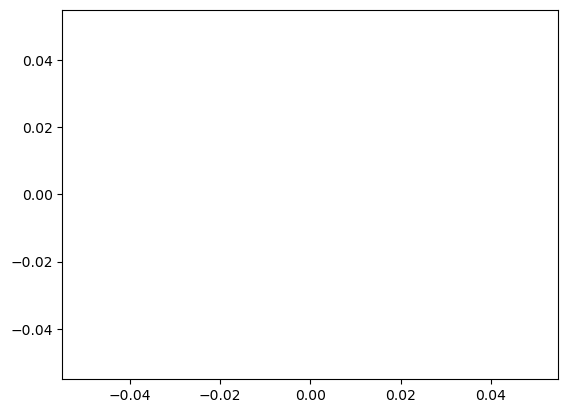

In [25]:
fig, ax = plt.plot(figsize=(15, 6),kw={'projection': ccrs.PlateCarree()})

# Plot the average precipitation
c1 = ax.contourf(lon_hr, lat_hr, avg_amj_hr, cmap='viridis', levels=100)
ax.coastlines()
ax.set_title('Average Daily Precipitation -- CPC')
plt.colorbar(c1, ax, label='Precipitation (mm)')

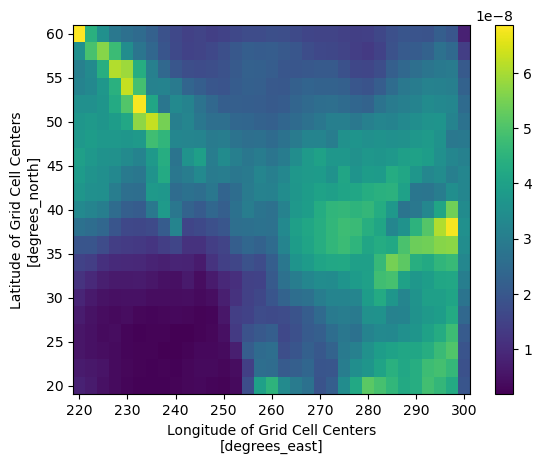

In [23]:
avg_amj_hr.plot()